# Objetivo:

 - Encontrar o melhor algoritmo  para fazer a previsão do preço do carro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/carros_sem_outliers.csv'


# url = 'https://raw.githubusercontent.com/robertferro/carros/main/3%20-%20EDA/carros_ml_pre_processados.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,motor,marca,modelo,preco,quilometragem,ano,informacoes
0,1.4,Chevrolet,Agile,25990,91000.0,2011,Agile 1.4 Lt 5p
1,1.4,Chevrolet,Agile,28900,123915.0,2013,Agile 1.4 Ltz 5p
2,1.4,Chevrolet,Agile,28000,91000.0,2013,Agile 1.4 Lt 5p
3,1.4,Chevrolet,Agile,31990,106863.0,2014,Agile Agile 1.4 Ltz 8v Flex 4p Manual
4,1.4,Chevrolet,Agile,28999,97000.0,2012,Agile 1.4 Mpfi Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motor          9508 non-null   float64
 1   marca          9508 non-null   object 
 2   modelo         9508 non-null   object 
 3   preco          9508 non-null   int64  
 4   quilometragem  9508 non-null   float64
 5   ano            9508 non-null   int64  
 6   informacoes    9508 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 520.1+ KB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9508.0,1.77,0.59,1.0,1.4,1.6,2.0,6.2
preco,9508.0,51969.07,27338.27,3500.0,31490.0,44990.0,68690.0,130000.0
quilometragem,9508.0,82622.77,35088.28,15000.0,54000.0,83000.0,110000.0,150000.0
ano,9508.0,2013.98,3.94,2000.0,2011.0,2014.0,2017.0,2021.0


In [7]:
df.isna().sum()

motor            0
marca            0
modelo           0
preco            0
quilometragem    0
ano              0
informacoes      0
dtype: int64

In [8]:
dados = df

In [9]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9508.0,1.77,0.59,1.0,1.4,1.6,2.0,6.2
preco,9508.0,51969.07,27338.27,3500.0,31490.0,44990.0,68690.0,130000.0
quilometragem,9508.0,82622.77,35088.28,15000.0,54000.0,83000.0,110000.0,150000.0
ano,9508.0,2013.98,3.94,2000.0,2011.0,2014.0,2017.0,2021.0


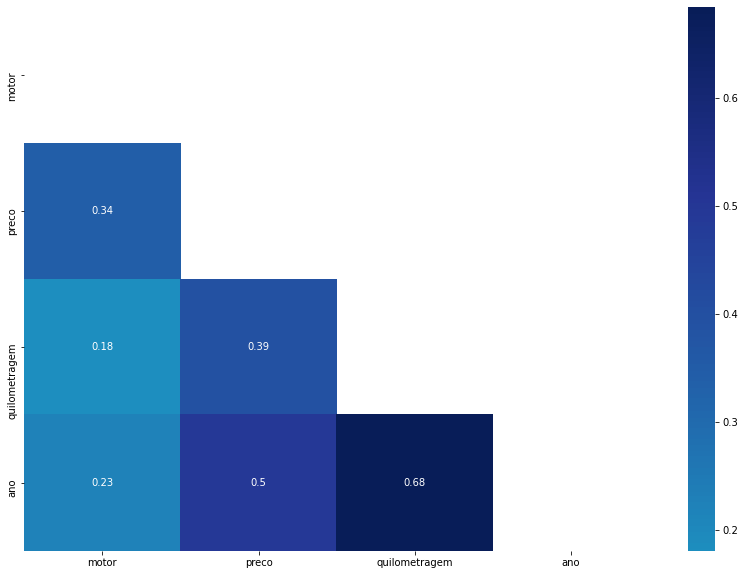

In [10]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

## Definindo as amostras de treino e teste

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enconder = LabelEncoder()

In [13]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [16]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [17]:
# treino['preco'] = treino['preco'].apply(np.log1p)
# treino['quilometragem'] = treino['quilometragem'].apply(np.log1p)
# teste['preco'] = teste['preco'].apply(np.log1p)
# teste['quilometragem'] = teste['quilometragem'].apply(np.log1p)

 - Modelo "Baseline" (Ponto de partida)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.4662657593007131

 - Machine learning

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9920684361286236
Test score 0.6871483794034482
Treinando RandomForestRegressor
Train score 0.9692838654924846
Test score 0.8124303319224033
Treinando MLPRegressor
Train score 0.16714439102062328
Test score 0.14024672786725711
Treinando XGBRegressor
[12:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.7517795336170815
Test score 0.7331753325889974


In [21]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9920684361286236
Validation score [0.64366933 0.68300435 0.67955394 0.71124416 0.6314409 ]
Test score 0.6807901900515241
Treinando RandomForestRegressor
Train score 0.9686569423737154
Validation score [0.80732508 0.81721068 0.81354793 0.80917172 0.78225929]
Test score 0.8132585159869479
Treinando MLPRegressor
Train score 0.16669557294658666
Validation score [0.14455358 0.18093664 0.15129477 0.18124826 0.17377699]
Test score 0.1398164578284652
Treinando XGBRegressor
[12:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

In [35]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)
xgb = gs.best_estimator_

train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=5)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[14:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9241765167784728
Validation score [0.81042954 0.82935794 0.81928472 0.81407381 0.79313608]
Test score 0.8255036368006831


 - Calculando o erro

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [37]:
y_pred = xgb.predict(X_teste)

In [38]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 7135.3629
MSE = 135504948.4461
RMSE = 11640.6593
R2 = 0.8255


## Gridserch RandomForest

In [48]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8722284306756357
Validation score [0.78618179 0.81373285 0.79277008 0.79811282 0.7770709 ]
Test score 0.7988519466024279


In [49]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 7854.1456
MSE = 156201287.5566
RMSE = 12498.0514
R2 = 0.7989
